In [1]:
%matplotlib inline

morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'


In [2]:
simdisk_dirname = "/Volumes/simulation_data_2018/reduced_snaps_v2"
nersc_dirname = "/global/u1/a/aphearin/reduced_galacticus_snaps"
import os
fname = os.path.join(simdisk_dirname, "reduced_259_magr-16.hdf5")

from astropy.table import Table
pdc2_v2_z1_snap = Table.read(fname, path='data')
print(pdc2_v2_z1_snap.keys())

/Users/aphearin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['isCentral', 'redshift', 'hostHaloMass', 'blackHoleMass', 'totalMassStellar', 'mag_u_rest', 'mag_u_obs', 'mag_g_rest', 'mag_g_obs', 'mag_r_rest', 'mag_r_obs', 'mag_i_rest', 'mag_i_obs', 'mag_z_rest', 'mag_z_obs']


In [3]:
from cosmodc2.sdss_colors import load_umachine_processed_sdss_catalog
sdss = load_umachine_processed_sdss_catalog()
# print(sdss.keys())

import os
dirname = "/Volumes/simulation_data_2018/protoDC2_v4"
basename_z0p00 = "umachine_color_mock_v4_m000-499.hdf5"
basename_z0p25 = "umachine_color_mock_v4_m000-392.hdf5"
basename_z0p50 = "umachine_color_mock_v4_m000-331.hdf5"
basename_z0p75 = "umachine_color_mock_v4_m000-286.hdf5"
basename_z1p00 = "umachine_color_mock_v4_m000-253.hdf5"

redshift = 1.0
if redshift == 0.0:
    basename = basename_z0p00
elif redshift == 0.25:
    basename = basename_z0p25
elif redshift == 0.5:
    basename = basename_z0p50
elif redshift == 0.75:
    basename = basename_z0p75
elif redshift == 1.0:
    basename = basename_z1p00


Lbox = 256.
Lbox_physical = Lbox/(1. + redshift)
Veff = Lbox_physical**3.


fname = os.path.join(dirname, basename)

from astropy.table import Table
pdc2_v4p3 = Table.read(fname, path='data')
pdc2_v4p3['redshift'] = redshift
pdc2_v4p3.rename_column('restframe_extincted_sdss_abs_magr', 'um_mag_r_rest')
pdc2_v4p3.rename_column('restframe_extincted_sdss_gr', 'um_gr_rest')
pdc2_v4p3.rename_column('restframe_extincted_sdss_ri', 'um_ri_rest')
pdc2_v4p3['um_mag_g_rest'] = pdc2_v4p3['um_gr_rest'] + pdc2_v4p3['um_mag_r_rest']

print(pdc2_v4p3.keys())

['source_halo_id', 'target_halo_id', 'target_halo_x', 'target_halo_y', 'target_halo_z', 'target_halo_vx', 'target_halo_vy', 'target_halo_vz', 'target_halo_mass', 'host_halo_mvir', 'upid', 'mpeak', 'host_centric_x', 'host_centric_y', 'host_centric_z', 'host_centric_vx', 'host_centric_vy', 'host_centric_vz', 'obs_sm', 'obs_sfr', 'sfr_percentile', 'um_mag_r_rest', 'um_gr_rest', 'um_ri_rest', 'is_on_red_sequence_gr', 'is_on_red_sequence_ri', 'x', 'vx', 'y', 'vy', 'z', 'vz', 'lightcone_id', 'redshift', 'um_mag_g_rest']


In [4]:
from cosmodc2.sdss_colors import v4_paint_colors_onto_umachine_snaps_temp as reassign_colors

result = reassign_colors(
    pdc2_v4p3['mpeak'], pdc2_v4p3['obs_sm'], 
    pdc2_v4p3['upid'], pdc2_v4p3['redshift'], 
    pdc2_v4p3['sfr_percentile'], pdc2_v4p3['host_halo_mvir'])

new_mstar, new_magr_rest, gr_mock, ri_mock, is_red_ri_mock, is_red_gr_mock = result
pdc2_v4p3['new_mag_r_rest'] = new_magr_rest
pdc2_v4p3['new_gr_rest'] = gr_mock
pdc2_v4p3['new_ri_rest'] = ri_mock
pdc2_v4p3['new_is_red_ri_mock'] = is_red_ri_mock
pdc2_v4p3['new_is_red_gr_mock'] = is_red_gr_mock



In [5]:
result = reassign_colors(
    pdc2_v4p3['mpeak'], pdc2_v4p3['obs_sm'], 
    pdc2_v4p3['upid'], pdc2_v4p3['redshift'], 
    pdc2_v4p3['sfr_percentile'], pdc2_v4p3['host_halo_mvir'],
    ms_peak_gr_zevol_shift_table=[0.0, -0.10, -0.15, -0.2],
    ms_peak_gr = [0.65, 0.65, 0.6, 0.4, 0.4, 0.35],
    red_peak_gr_zevol_shift_table=[0, -0.05, -0.15, -0.2],
    ms_peak_ri_zevol_shift_table=[0.0, -0.05, -0.075, -0.1])

new_mstar, new_magr_rest, gr_mock, ri_mock, is_red_ri_mock, is_red_gr_mock = result
pdc2_v4p3['new2_mag_r_rest'] = new_magr_rest
pdc2_v4p3['new2_gr_rest'] = gr_mock
pdc2_v4p3['new2_ri_rest'] = ri_mock
pdc2_v4p3['new2_is_red_ri_mock'] = is_red_ri_mock
pdc2_v4p3['new2_is_red_gr_mock'] = is_red_gr_mock


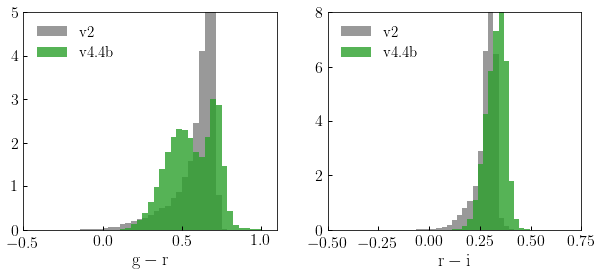

In [6]:
faint, bright = -22, -25


v2_mask = (pdc2_v2_z1_snap['mag_r_rest'] < faint)
v2_mask *= (pdc2_v2_z1_snap['mag_r_rest'] >= bright)

mask0 = (pdc2_v4p3['um_mag_r_rest'] < faint)
mask0 *= (pdc2_v4p3['um_mag_r_rest'] >= bright)

mask1 = (pdc2_v4p3['new_mag_r_rest'] < faint)
mask1 *= (pdc2_v4p3['new_mag_r_rest'] >= bright)

# mask2 = (pdc2_v4p3['new2_mag_r_rest'] < faint)
# mask2 *= (pdc2_v4p3['new2_mag_r_rest'] >= bright)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

gr_bins = np.linspace(-0.5, 1.25, 50)
ri_bins = np.linspace(-0.5, 0.75, 50)

__=ax1.hist(pdc2_v2_z1_snap['mag_g_rest'][v2_mask]-pdc2_v2_z1_snap['mag_r_rest'][v2_mask], 
           normed=True, bins=gr_bins, alpha=0.8, label=r'${\rm v2}$', color='gray')
# __=ax1.hist(pdc2_v4p3['um_gr_rest'][mask0], 
#            normed=True, bins=gr_bins, alpha=0.8, label=r'${\rm v4.3}$', color=morange)
# __=ax1.hist(pdc2_v4p3['new_gr_rest'][mask1], normed=True, bins=gr_bins, 
#            alpha=0.8, label=r'${\rm v4.4}$', color=mblue)
__=ax1.hist(pdc2_v4p3['new2_gr_rest'][mask1], normed=True, bins=gr_bins, 
           alpha=0.8, label=r'${\rm v4.4b}$', color=mgreen)

__=ax2.hist(pdc2_v2_z1_snap['mag_r_rest'][v2_mask]-pdc2_v2_z1_snap['mag_i_rest'][v2_mask], 
           normed=True, bins=ri_bins, alpha=0.8, label=r'${\rm v2}$', color='gray')
# __=ax2.hist(pdc2_v4p3['um_ri_rest'][mask0], 
#            normed=True, bins=ri_bins, alpha=0.8, label=r'${\rm v4.3}$', color=morange)
# __=ax2.hist(pdc2_v4p3['new_ri_rest'][mask1], normed=True, bins=ri_bins, 
#            alpha=0.8, label=r'${\rm v4.4}$', color=mblue)
__=ax2.hist(pdc2_v4p3['new2_ri_rest'][mask1], normed=True, bins=ri_bins, 
           alpha=0.8, label=r'${\rm v4.4b}$', color=mgreen)

leg1 = ax1.legend()
leg2 = ax2.legend()

xlim1 = ax1.set_xlim(-0.5, 1.1)
xlim2 = ax2.set_xlim(-0.5, 0.75)
ylim1 = ax1.set_ylim(0, 5)
ylim2 = ax2.set_ylim(0, 8)

xlabel1 = ax1.set_xlabel(r'${\rm g-r}$')
xlabel2 = ax2.set_xlabel(r'${\rm r-i}$')

In [ ]:
# from cosmodc2.sdss_colors.analytical_colors import r_minus_i
# from cosmodc2.sdss_colors.analytical_colors import g_minus_r

# ri, is_red_ri = r_minus_i(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'], 
#                           pdc2_v4p3['redshift'])
# gr, is_red_gr = g_minus_r(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'], 
#                pdc2_v4p3['redshift'])

In [ ]:
zlo, zhi = 0.85, 0.95
zmask = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)

galacticus_mock = pdc2_v2_z1_snap

fig, _axes = plt.subplots(2, 2, figsize=(10, 8))
((ax1, ax2), (ax3, ax4)) = _axes
axes = ax1, ax2, ax3, ax4

gr_bins = np.linspace(-0.25, 1, 150)
ri_bins = np.linspace(-0.25, 1, 150)

###  Upper left panel
faint, bright = -18.5, -19.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint) & (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
abs_r_mask3 = (pdc2_v4p3['new_mag_r_rest'] < faint) & (pdc2_v4p3['new_mag_r_rest'] >= bright)

__=ax1.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-
            galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax1.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2 & zmask]-
            pdc2_v4p3['mag_r_rest'][abs_r_mask2& zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax1.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

###  Upper right panel
faint, bright = -19.5, -20.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint)
abs_r_mask *= (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
abs_r_mask3 = (pdc2_v4p3['new_mag_r_rest'] < faint) & (pdc2_v4p3['new_mag_r_rest'] >= bright)

__=ax2.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-
            galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax2.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2 & zmask]-
            pdc2_v4p3['mag_r_rest'][abs_r_mask2 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax2.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

###  Lower right panel
faint, bright = -20.5, -21.5
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint)
abs_r_mask *= (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
abs_r_mask3 = (pdc2_v4p3['new_mag_r_rest'] < faint) & (pdc2_v4p3['new_mag_r_rest'] >= bright)
__=ax3.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-
            galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax3.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2 & zmask]-
            pdc2_v4p3['mag_r_rest'][abs_r_mask2 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax3.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')


###  Lower right panel
faint, bright = -21.5, -np.inf
abs_r_mask = (galacticus_mock['mag_r_rest'] < faint)
abs_r_mask *= (galacticus_mock['mag_r_rest'] >= bright)
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)
abs_r_mask3 = (pdc2_v4p3['new_mag_r_rest'] < faint) & (pdc2_v4p3['new_mag_r_rest'] >= bright)
__=ax4.hist(galacticus_mock['mag_g_rest'][abs_r_mask]-
            galacticus_mock['mag_r_rest'][abs_r_mask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v2}$')
__=ax4.hist(pdc2_v4p3['mag_g_rest'][abs_r_mask2 & zmask]-
            pdc2_v4p3['mag_r_rest'][abs_r_mask2 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.3}$')
__=ax4.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

leg1 = ax1.legend()
leg2 = ax2.legend()
leg3 = ax3.legend()
leg4 = ax4.legend()

title1 = ax1.set_title(r'${\rm z=0.9}; -18.5 < M_{\rm r} < -19.5$')
title2 = ax2.set_title(r'${\rm z=0.9}; -19.5 < M_{\rm r} < -20.5$')
title3 = ax3.set_title(r'${\rm z=0.9}; -20.5 < M_{\rm r} < -21.5$')
title4 = ax4.set_title(r'${\rm z=0.9}; M_{\rm r} < -21.5$')


xlabel1 = ax1.set_xlabel(r'${\rm g-r\ (restframe)}$')
xlabel2 = ax2.set_xlabel(r'${\rm g-r\ (restframe)}$')
xlabel3 = ax3.set_xlabel(r'${\rm g-r\ (restframe)}$')
xlabel4 = ax4.set_xlabel(r'${\rm g-r\ (restframe)}$')

ylabel1 = ax1.set_ylabel(r'${\rm PDF}$')
ylabel3 = ax3.set_ylabel(r'${\rm PDF}$')

ylim1 = ax1.set_ylim(0, 7)
ylim2 = ax2.set_ylim(0, 7)
ylim3 = ax3.set_ylim(0, 6)
# ylim4 = ax4.set_ylim(0, 13)

xmin, xmax = -0.25, 1.1
xlim1 = ax1.set_xlim(xmin, xmax)
xlim2 = ax2.set_xlim(xmin, xmax)
xlim3 = ax3.set_xlim(xmin, xmax)
xlim4 = ax4.set_xlim(xmin, xmax)

plt.subplots_adjust(hspace=0.5)


In [ ]:
faint, bright = -19.5, -20.5
abs_r_mask3 = (pdc2_v4p3['new_mag_r_rest'] < faint)
abs_r_mask3 *= (pdc2_v4p3['new_mag_r_rest'] >= bright)

zlo, zhi = 0., 0.25
zmask = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)

mask = abs_r_mask3 & zmask
num_red = np.count_nonzero(mask & is_red_gr_mock)
num_total = np.count_nonzero(mask)
print("Red fraction = {0:.2f}".format(num_red/float(num_total)))

# cluster_mask = pdc2_v4p3['um_host_halo_mvir'] > 10**13.5
# num_cluster_red = np.count_nonzero(mask & is_red_gr_mock & cluster_mask)
# num_total_cluster = np.count_nonzero(mask & cluster_mask)
# print("Cluster red fraction = {0:.2f}".format(num_cluster_red/float(num_total_cluster)))

gr_bins = np.linspace(-0.25, 1, 150)

fig, ax = plt.subplots(1, 1)

__=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

__=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask & is_red_gr_mock], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

__=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask & ~is_red_gr_mock], 
            bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')


In [ ]:
print(pdc2_v4p3.keys())

In [ ]:
faint, bright = -21.5, -np.inf
abs_r_mask2 = (pdc2_v4p3['mag_r_rest'] < faint) & (pdc2_v4p3['mag_r_rest'] >= bright)

zlo, zhi = 0., 0.25
zmask = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)

is_red_mask = pdc2_v4p3['um_is_on_red_sequence_gr'] == True

mask = abs_r_mask2 & zmask
num_red = np.count_nonzero(mask & is_red_mask)
num_total = np.count_nonzero(mask)
print("Red fraction = {0:.2f}".format(num_red/float(num_total)))

cluster_mask = pdc2_v4p3['um_host_halo_mvir'] > 10**14
num_cluster_red = np.count_nonzero(mask & is_red_mask & cluster_mask)
num_total_cluster = np.count_nonzero(mask & cluster_mask)
print("Cluster red fraction = {0:.2f}".format(num_cluster_red/float(num_total_cluster)))

# gr_bins = np.linspace(-0.25, 1, 150)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask], 
#             bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

# __=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask & is_red_gr_mock], 
#             bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')

# __=ax.hist(pdc2_v4p3['new_gr_rest'][abs_r_mask3 & zmask & ~is_red_gr_mock], 
#             bins=gr_bins, normed=True, alpha=0.8, label=r'${\rm protoDC2\ v4.4}$')


In [ ]:
print(pdc2_v4p3.keys())

In [ ]:
zlo, zhi = 0., 0.3

zmask = (pdc2_v4p3['redshift'] < zhi) & (pdc2_v4p3['redshift'] >= zlo)

cluster_mask = pdc2_v4p3['um_host_halo_mvir'] > 10**13.75

cenmask = pdc2_v4p3['um_upid'] == -1

fig, ax = plt.subplots(1, 1)

magr_bins = np.linspace(-25, -16, 30)
__=ax.hist(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'][zmask], 
          normed=True, bins=magr_bins, alpha=0.8, label=r'${\rm all\ galaxies}$')
# __=ax.hist(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'][zmask & cluster_mask], 
#           normed=True, bins=magr_bins, alpha=0.8)
__=ax.hist(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'][zmask & cluster_mask & cenmask], 
          normed=True, bins=magr_bins, alpha=0.8, label=r'${\rm cluster\ centrals}$')
__=ax.hist(pdc2_v4p3['um_restframe_extincted_sdss_abs_magr'][zmask & cluster_mask & ~cenmask], 
          normed=True, bins=magr_bins, alpha=0.8, label=r'${\rm cluster\ satellites}$')

xlim = ax.set_xlim(-15, -25)
xlabel = ax.set_xlabel(r'${\rm M_r}$')
ylabel = ax.set_ylabel(r'${\rm PDF}$')
legend = ax.legend()
title = ax.set_title(r'${\rm 0 < z < 0.3}$')

figname = '_cluster_lf_v4p3_eli_test.png'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

In [ ]:
pwd